# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

In [21]:
func = 'beta'
print('con la funcion  clasica', np.random.rand)
print('con la funcion nueva   ', getattr(np.random, func))

con la funcion  clasica <built-in method rand of numpy.random.mtrand.RandomState object at 0x7f84f0c8dc40>
con la funcion nueva    <built-in method beta of numpy.random.mtrand.RandomState object at 0x7f84f0c8dc40>


In [38]:
st.norm(**{'loc': 7, 'scale': 3}).rvs(10)

array([2.02808156, 4.78028299, 4.64298248, 1.13303765, 5.48072979,
       2.22877066, 0.42016738, 6.65935843, 9.56102163, 5.69378297])

In [39]:
dir(st)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'NumericalInverseHermite',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_bootstrap',
 '_common',
 '_constants',
 '_continuous_distns',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_hypotests',
 '_ksstats',
 '_mannwhitneyu',
 '_multivariate',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_relative_risk',
 '_rvs_sampling',
 '_sobol',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'barnard_exact',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'biasedurn',
 'binned_s

### Ilustración método de la transformada inversa con paquete `stats`

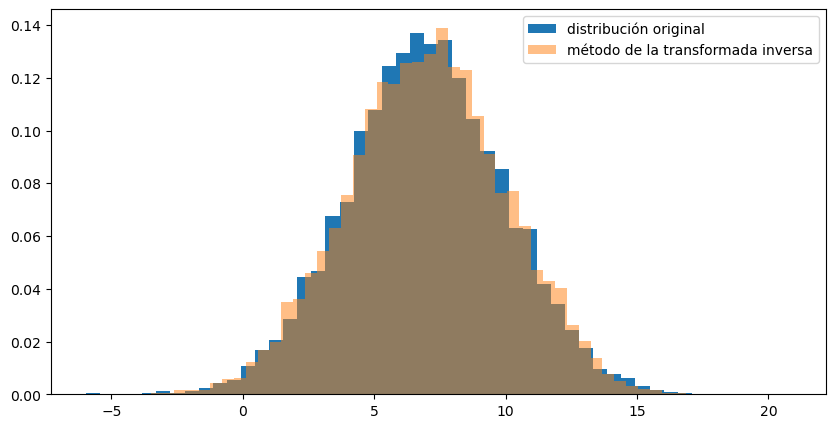

In [41]:
# Elegir la distribución
name_dist = 'norm'
# Explorar la función de la función getattr
dist = getattr(st, name_dist)
# Parametros de la distribución (tupla)
params = 2
# Cantidad de términos
N = 10000
# Diccionario de argumentos de la distribución
args = {'loc': 7, 'scale': 3}

# Generación de variable aleatorias de la distrubición elegida
x = dist(**args).rvs(N)

# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50, density=True, label='distribución original');

# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)
f_inv = dist(**args).ppf(U)
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa', alpha=0.5);
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>2
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa
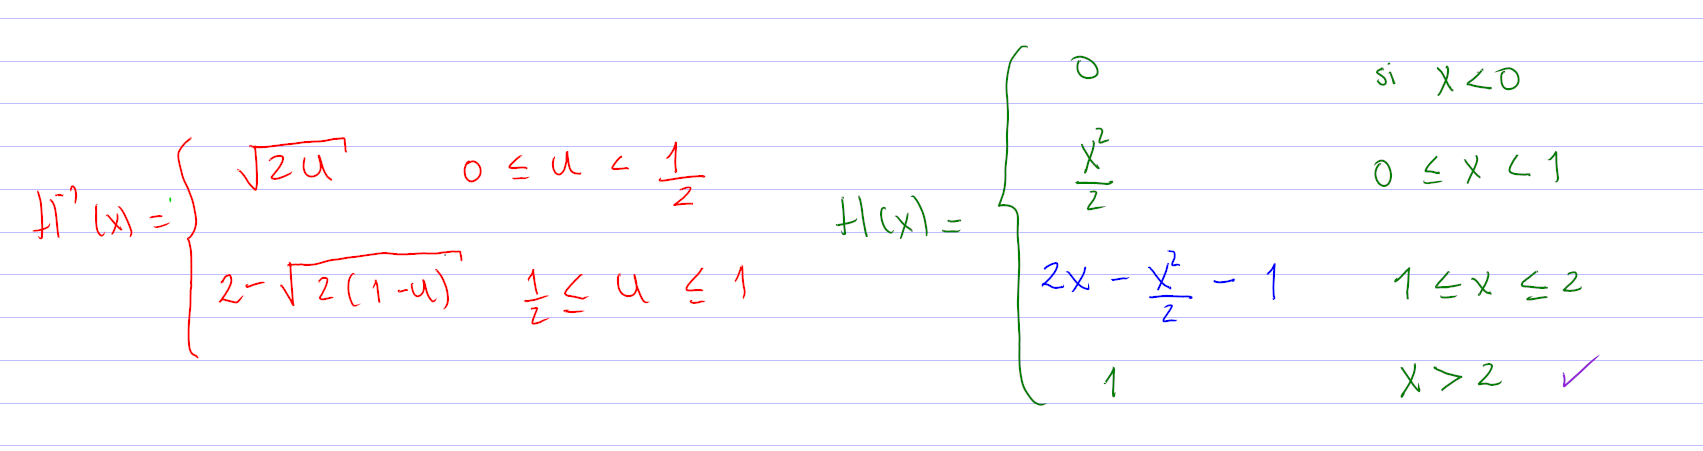

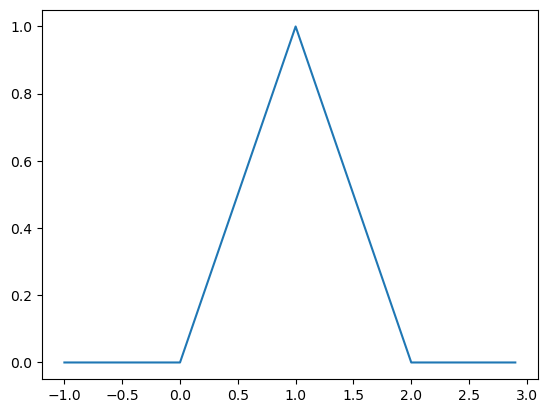

In [50]:
H_inv = lambda u: np.sqrt(2*u) if 0<=u<1/2 else 2 - np.sqrt(2*(1-u))
# Graficar h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x <= 2 else 0))

x = np.arange(-1, 3, 0.1)
plt.plot(x, [h(n) for n in x])

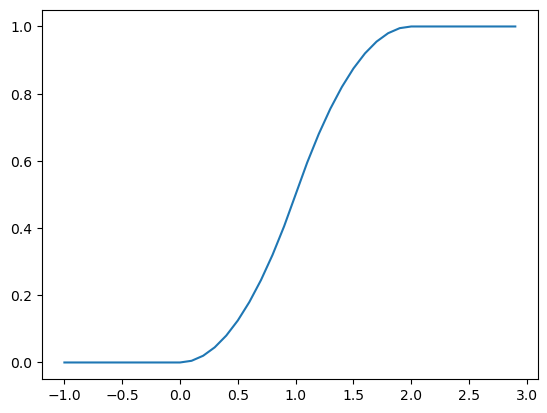

In [51]:
H = lambda x: 0 if x < 0 else (x**2 / 2 if 0<=x<1 else (2*x-x**2/2 - 1 if 1<=x<=2 else 1))

plt.plot(x, [H(n) for n in x])

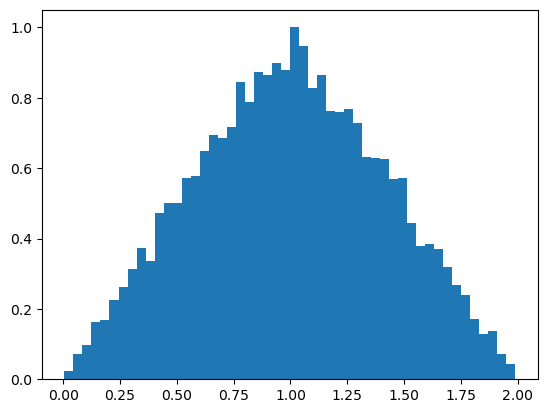

In [53]:
H_inv = lambda u: np.sqrt(2*u) if 0<=u<1/2 else 2 - np.sqrt(2*(1-u))
N = 10000
U = np.random.rand(N)
x_gen = [H_inv(ui) for ui in U]

plt.hist(x_gen, bins=50, density=True);

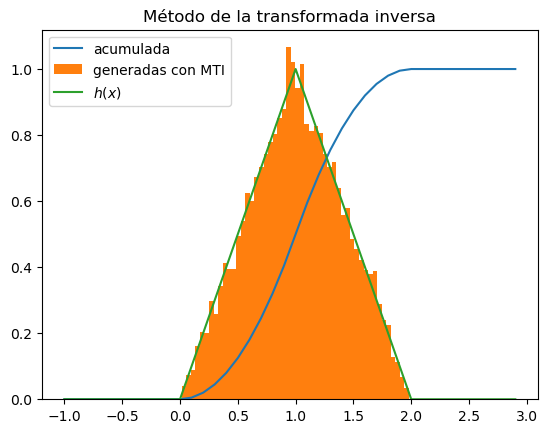

In [55]:
# Crear función acumulada
H = lambda x: 0 if x < 0 else (x**2 / 2 if 0<=x<1 else (2*x-x**2/2 - 1 if 1<=x<=2 else 1))

# Graficar función acumulada
x = np.arange(-1, 3, 0.1)
plt.plot(x, [H(n) for n in x], label='acumulada')

# Crear función inversa
H_inv = lambda u: np.sqrt(2*u) if 0<=u<1/2 else 2 - np.sqrt(2*(1-u))

# Validar función inversa (gráfica)
N = 10000

# Vector de aleatorios uniformer
U = np.random.rand(N)

# Vector generado con MTI
x_gen = [H_inv(ui) for ui in U]

# Graficar histograma aleatorios
plt.hist(x_gen, bins=50, density=True, label='generadas con MTI');

# Función de densidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x < 2 else 0))

density = list(map(lambda x: h(x), x))
# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.title('Método de la transformada inversa')
plt.legend();

### Método de aceptación y rechazo

In [58]:
def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = [f(ri) for ri in R1]
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
                
    return x

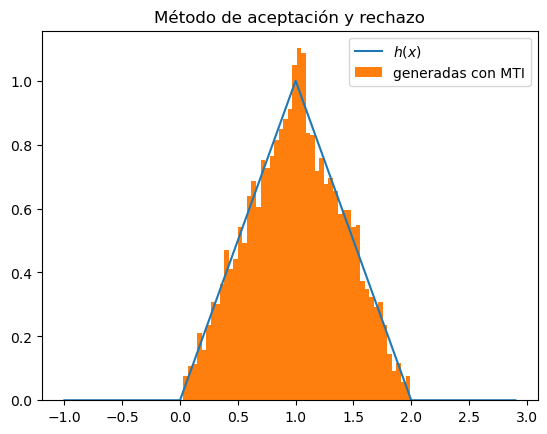

In [62]:
N = 10000
# Graficar densidad de probabilidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x < 2 else 0))

density = list(map(lambda x: h(x), x))
# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')

# Programar método de aceptación y rechazo
max_h = 1
t = lambda x: max_h * np.ones(len(x))
R1 = np.random.uniform(0, 2, N)
R2 = np.random.uniform(0, 1, N)

x_gen_2 = Acep_rechazo3(R2, R1, h, t)

# Graficar puntos aceptados
plt.hist(x_gen_2, bins=50, density=True, label='generadas con MTI');

plt.title('Método de aceptación y rechazo')

plt.legend()
# Almacenar números aceptados en una variable y graficar su histograma


## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

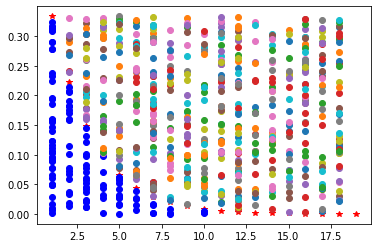

In [71]:
N = 700
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)
